<h1>Introduction and Instructions:</h1><br>
<h4>Hi There!!</h4>
<br><h4>This is the Instabot part 2- An instagram bot which will scrape some important information for you!!!</h4><br>
<h2>Following are some points which are worth reading before you look forward to run this program/notebook</h2><br>
<li>Just run the complete code once. Do not run each Cell separatly</li>
<li>Let the driver window run in maximised mode. Do not run it in windowed mode(It will maximise by itself)</li>
<li>Do not make any changes in the code except the SAMPLE_USERNAME and SAMPLE_PASSWORD. you can easily change them by refering the code below.</li>
<li>This code is written and tested with 4G network(AIRTEL). if you are using a 3G connection, you might want to change the time gap between several Cells(at the end of some cells there is a line of code whose parameters you might want to alter.</li>
<li>Sometimes you will feel like the website is frozen. No! Its not. The code is still running doing its work. You will notice this specially when this information from a instagram video is being scrapped.</li>


In [1]:
#importing important modules
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

In [2]:
driver=webdriver.Chrome('f://chromedriver.exe')
driver.maximize_window()
#started webdriver

In [3]:
driver.get('https://www.instagram.com')

In [4]:
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.LINK_TEXT, "Log in")))
driver.find_element_by_link_text('Log in').click()
#clicked the login button

In [5]:
#username
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[contains(@class, "_2hvTZ")]')))
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//button[contains(@class, "_0mzm-")]/div[contains(@class, "Igw0E")]')))
username='SAMPLE_USERNAME'
#password
password='SAMPLE_PASSWORD'
#input username
driver.find_element_by_xpath('//input[contains(@class, "_2hvTZ")]').send_keys(username)
#input password
driver.find_elements_by_xpath('//input[contains(@class, "_2hvTZ")]')[1].send_keys(password)
#click login
driver.find_element_by_xpath('//button[contains(@class, "_0mzm-")]/div[contains(@class, "Igw0E")]').click()

In [6]:
#in the prompt click "not now"
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//button[contains(@class, "HoLwm")]')))
driver.find_element_by_xpath('//button[contains(@class, "HoLwm")]').click()

<h1>Q1.1 Re-Scraping the instagram handles which will appear on typing "Food" in the search bar.</h1>

In [7]:
#searching for "food" again in the search bar and storing the top 10 usernames in a list
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//span[contains(@class, "TqC_a")]')))
time.sleep(2)
driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys('food')
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="Ap253"]')))
time.sleep(3)

In [8]:
count=0
users=[]
# list of top 10 users will be stored in this list.
for i in driver.find_elements_by_xpath('//span[@class="Ap253"]'):
    user_n=i.get_attribute('innerHTML')
    if user_n[0]!='#' and count<10:
        users.append(i.get_attribute('innerHTML'))
        count+=1
driver.find_element_by_xpath('//div[contains(@class, "coreSpriteSearchClear")]').click()

#now i will iterate through all the usernames in this list and do whatever is asked in the question
followers=[]
#this list will contain the number of followers of 10 users.


for user in users:
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="-nal3 "]/span[@class="g47SY "]')))
    followers.append(driver.find_element_by_xpath('//a[@class="-nal3 "]/span[@class="g47SY "]').get_attribute('innerHTML'))
    time.sleep(3.2)
#now finally we have 2 arrays with usernames of users and their followers as a string. we need to convert this string into...
#an integer somehow.

In [9]:
users

['foodprintsofdelhi',
 'foodbloggerai',
 'foodandkhan',
 'foodfreaks_jpr',
 'the_foodie_moody',
 'poetic_foodie_989',
 'food',
 'foodswerve',
 'food_fantasy___',
 'the_tipsy_foodie']

In [10]:
for i in range(len(followers)):
    if not 'k' in followers[i]:
        followers[i]=int("".join(followers[i].split(',')))
    else:
        followers[i]=float(followers[i][:-1])*1000
followers=np.array(followers, dtype='int')
users=np.array(users)
#sorted in ascending order
users=users[np.argsort(followers)][::-1]
followers=followers[np.argsort(followers)][::-1]
#now printing top 5 
top5=[]
for x in range(5):
    print(users[x])
    top5.append(users[x])
#following is a list of users with highest number of followers among those top 10.

foodandkhan
the_foodie_moody
foodfreaks_jpr
the_tipsy_foodie
foodswerve


<h1>Q1.2. Finding the number of posts these handles have done in the previous 3 days.</h1>

In [11]:
#iterating through the list of top 5 users with maximum followers
#and counting the number of posts they have done in past 3 days
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]')))
driver.find_element_by_xpath('//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]').click()
no_of_posts=[]
for user in top5:
    time.sleep(3)
    print(user, end=' ')
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        time_string=driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')
        if time_string[-1] in ['h', 's']:
            count+=1
        elif time_string[-1]=='d' and int(time_string[:-1])<=3:
            count+=1
        else:
            driver.back()
            break
        driver.back()
        time.sleep(1)
    print("have done", count, "posts in past 3 days")
    no_of_posts.append(count)

foodandkhan have done 0 posts in past 3 days
the_foodie_moody have done 1 posts in past 3 days
foodfreaks_jpr have done 3 posts in past 3 days
the_tipsy_foodie have done 0 posts in past 3 days
foodswerve have done 4 posts in past 3 days


<h1>Q1.3. Plotting Graph</h1>

<Figure size 432x288 with 0 Axes>

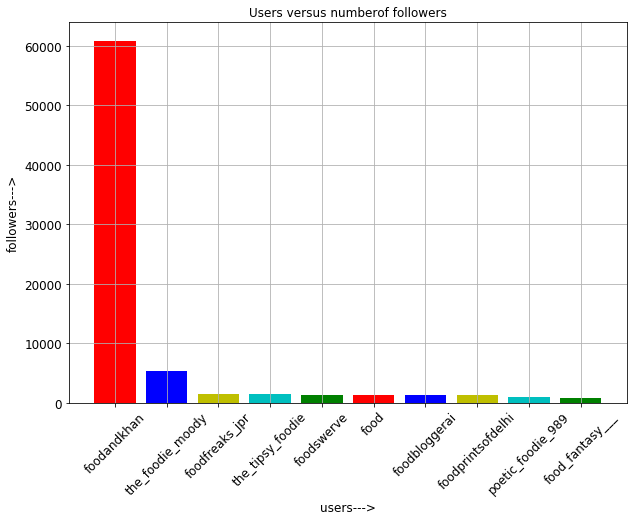

<Figure size 432x288 with 0 Axes>

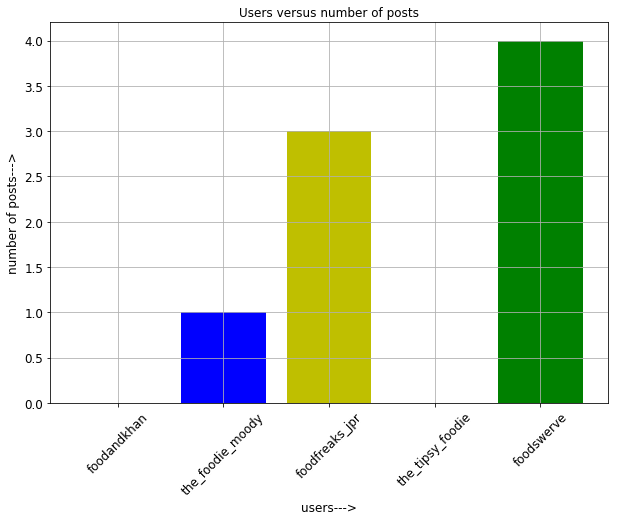

In [12]:
#plotting a graph between those 10 users and the number of followers
plt.subplots(0, 0)
plt.figure(figsize=(10, 7))
plt.bar(users, followers, color='rbycg')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus numberof followers', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('followers--->', size=12)
plt.grid()
plt.show()

#graph between top 5 users and the number of posts
plt.subplots(0, 1)
plt.figure(figsize=(10, 7))
plt.bar(top5, no_of_posts, color='rbycg')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('number of posts--->', size=12)
plt.grid()
plt.show()

<h1>Q2.1. Opening the 5 handles I obtained in the last question, and scraping the content of the first 10 posts of each handle.</h1>

In [13]:
#the idea is to visit each page and go to each of the 10 posts and scrape the content and hashtags from there and store them in the
#separate lists
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]')))
driver.find_element_by_xpath('//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]').click()
content=[]
hashtags=[]
for user in top5:
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
        content.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
        for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            hashtags.append(hashes.get_attribute('innerHTML'))
        count+=1
        if count>=10:
            driver.back()
            break
        driver.back()
        time.sleep(1)
#finally i have two lists one named hashtags which contains all the hashtags, but unfortunately it also contains some usernames too.
#wee nee to filter them. and we also have a list named "content" which contains all the content of the perticular post

In [14]:
#this is the scrapped content of all posts
for i in content:
    print(i)
    print("-------------------------------------------------------------------------------------------------------------")

Cheese paratha @snphookahlounge made a wholesome lunch with a taste quenching all ends of my taste bud. Andeywala has a separate lounge called SNP lounge for shisha and a menu If you are looking for something different than their amazing andeywala menu. From fries to fried rice, they got it all. .Paratha wasn't in a geometric shape you expect parathas to be but that didn't take away anything from its taste. Sumptuous cheese oozing out of every bite of the paratha. Plus their garlic chutney does wonders when taken with the paratha...Looking for some fine tasteworthy food without burning a hole in your pocket?Drop by...They have a huge variety of options to try from and egglicious menu you'll love to introduce yourself to.Taste - 4/5#food#love#life#Kolkata#food#foodporn#foodloverskolkata#foodgasms#foodphotography#instafood#foodlicious#indianblogger#kolkatablogger#allaboutfood#instafood#foodie#indianfood#indianfoodbloggers#kolkatafoodguide#foodstagram#foodblogger#footfetishnation#healthyf

<h1>Q2.2. Preparing a list of all words used in all the scraped posts and calculating the frequency of each word.</h1>

In [15]:
#here in the question i am considering that "words" mean hashtags. because there will be no sense of getting the frequency of all the words in the content.
#firstly i will convert the "hashtags" list to a numpy array
hashtags=np.array(hashtags)
hash_tags=[]#it will contain all the actual hashtags, where all the usernames are filtered from the hashtags array
for i in hashtags:
    if not i[0]=='@' and i!='':
        hash_tags.append(i)
#now "hash_tags" is the actual array which we actually require so we will keep it

In [16]:
dic=dict()#this will store the frequencies of all the hashtags
for i in hash_tags:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
dic
#this is our dictionary which contains all the frequencies of the hashtags

{'#food': 27,
 '#love': 6,
 '#life': 4,
 '#Kolkata': 2,
 '#foodporn': 23,
 '#foodloverskolkata': 9,
 '#foodgasms': 10,
 '#foodphotography': 25,
 '#instafood': 17,
 '#foodlicious': 11,
 '#indianblogger': 13,
 '#kolkatablogger': 7,
 '#allaboutfood': 7,
 '#foodie': 17,
 '#indianfood': 4,
 '#indianfoodbloggers': 9,
 '#kolkatafoodguide': 10,
 '#foodstagram': 11,
 '#foodblogger': 11,
 '#footfetishnation': 2,
 '#healthyfood': 6,
 '#buzztasy': 10,
 '#delhiblogger': 11,
 '#foodblogfeed': 8,
 '#foodinstagram': 5,
 '#foodinspiration': 5,
 '#kolkatadiaries': 9,
 '#momo': 2,
 '#dimsum': 1,
 '#eeeeeats': 4,
 '#indianfoodie': 7,
 '#foodtalkindia': 2,
 '#lbbkolkata': 2,
 '#foodintheair': 5,
 '#momos': 2,
 '#kolkatagram': 5,
 '#eggslut': 1,
 '#chinesefood': 8,
 '#kolkatasutra': 4,
 '#cityofjoy': 1,
 '#streetfood': 2,
 '#indianstreetfood': 5,
 '#foodiesofinstagram': 2,
 '#bangaloreblogger': 1,
 '#bangalorediaries': 1,
 '#bangalorefoodies': 1,
 '#bangalore': 1,
 '#lbbbangalore': 1,
 '#chinese': 1,
 '#del

<h1>Q2.3. Creating a csv file with two columns : the word and its frequency</h1>

In [17]:
hash_word=np.array([i[1:] for i in dic.keys()])
frequency=np.array([i for i in dic.values()])
df=pd.DataFrame()
df['Words']=hash_word
df['Frequency']=frequency
df.to_csv('Hashtag_Frequencies.csv')
#hence the file is saved in the working directory

<h1>Q2.4. Finding the hashtags that were most popular among these bloggers</h1>

In [18]:
#we have the two arrays named hash_word and frequency.
#we will first arrange them in descending order and then print the hashtags that were most popular among them.

In [19]:
hash_word=hash_word[np.argsort(frequency)][::-1]
frequency=frequency[np.argsort(frequency)][::-1]
for i in range(len(hash_word)):
    print(hash_word[i], "----->", frequency[i], "times")

food -----> 27 times
foodphotography -----> 25 times
foodporn -----> 23 times
foodie -----> 17 times
instafood -----> 17 times
indianblogger -----> 13 times
delhifoodblogger -----> 12 times
delhiblogger -----> 11 times
foodblogger -----> 11 times
foodstagram -----> 11 times
foodlicious -----> 11 times
foodswerve -----> 10 times
buzztasy -----> 10 times
kolkatafoodguide -----> 10 times
foodgasms -----> 10 times
like4likes -----> 10 times
buzzfeastfood -----> 9 times
sokolkata -----> 9 times
thegreatindianfoodie -----> 9 times
foodloverskolkata -----> 9 times
foodfreaks_jpr -----> 9 times
kolkatadiaries -----> 9 times
mumbaistreetfood -----> 9 times
kolkatabuzz -----> 9 times
indianfoodbloggers -----> 9 times
kolkatafoodblogger -----> 9 times
instagram -----> 8 times
foodlover -----> 8 times
chinesefood -----> 8 times
foodblogfeed -----> 8 times
buzzfeedfood -----> 8 times
instagood -----> 8 times
indianfoodie -----> 7 times
FoodTalkindia -----> 7 times
allaboutfood -----> 7 times
kolkat

milkshake -----> 1 times
icecream -----> 1 times
shakes -----> 1 times
burgerporn -----> 1 times
dinner -----> 1 times
hamburger -----> 1 times
spicy -----> 1 times
fastfood -----> 1 times
cheese -----> 1 times
frenchfries -----> 1 times
chillicheesetoast -----> 1 times
instadaily -----> 1 times
ccd -----> 1 times
like4follow -----> 1 times
cafecoffeeday -----> 1 times
fitness -----> 1 times
desifoodie -----> 1 times
vegans -----> 1 times
veganfood -----> 1 times
indiafood -----> 1 times
instatraveling -----> 1 times
travelblogger -----> 1 times
fashionindia -----> 1 times


<h1>Q2.5. Plotting a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.</h1>

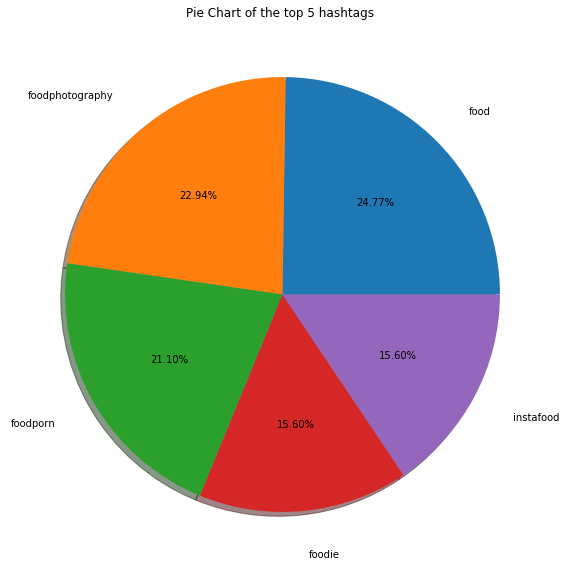

In [20]:
x=hash_word[:5]
y=frequency[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%', shadow=True, labeldistance=1.2)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

<h1>Q3.1. Finding out the likes of the top 10 posts of the 5 handles obtained earlier.</h1>

In [21]:
like=[]
for user in top5:
    print(user, end="----> ")
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    likes=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        #clicks on the post of the user being iterated.
        try:
            WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[@class="Nm9Fw"]/button[contains(@class, "_0mzm-")]/span')))
            likes+=int("".join(driver.find_element_by_xpath('//div[@class="Nm9Fw"]/button[contains(@class, "_0mzm-")]/span').get_attribute('innerHTML').split(',')))
        except TimeoutException:
            WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span')))
            likes+=int("".join(driver.find_element_by_xpath('//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span').get_attribute('innerHTML').split(',')))
        count+=1
        if count>=10:
            driver.back()
            break
        driver.back()
        time.sleep(1)
    print("total", likes, "likes on 10 latest posts")
    like.append(likes)

foodandkhan----> total 1389 likes on 10 latest posts
the_foodie_moody----> total 619 likes on 10 latest posts
foodfreaks_jpr----> total 1205 likes on 10 latest posts
the_tipsy_foodie----> total 5033 likes on 10 latest posts
foodswerve----> total 5427 likes on 10 latest posts


In [22]:
top5=np.array(top5)
top5

array(['foodandkhan', 'the_foodie_moody', 'foodfreaks_jpr',
       'the_tipsy_foodie', 'foodswerve'], dtype='<U16')

In [23]:
like=np.array(like)
#likes on the top 10 posts for those 5 users
like

array([1389,  619, 1205, 5033, 5427])

In [24]:
followers[0:5]
#followers of those 5 users

array([60900,  5315,  1476,  1474,  1317])

<h1>Q3.2. Calculating the average likes for a handle.</h1>

In [25]:
average_likes=like/10
average_likes
#these are the average likes of the respective 5 users.

array([138.9,  61.9, 120.5, 503.3, 542.7])

<h1>Q3.3. Dividing the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle</h1>

In [26]:
#for getting average followers to likes ratio
ratio=followers[0:5]/average_likes
ratio

array([438.44492441,  85.86429725,  12.24896266,   2.92867077,
         2.42675511])

<h1>Q3.4. Creating a bar graph to depict the above obtained information.</h1>

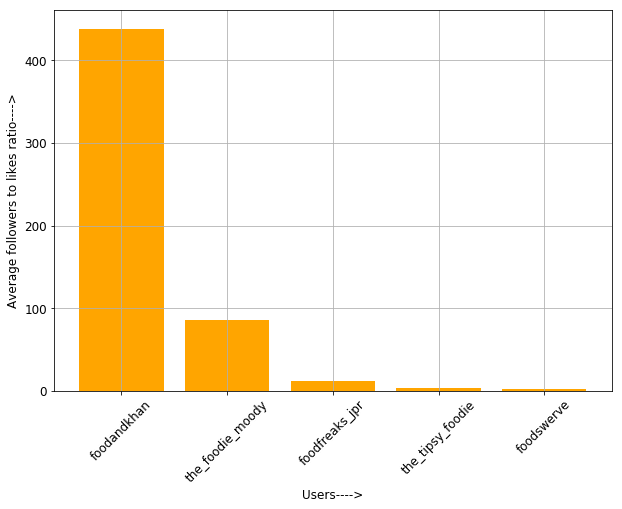

In [27]:
#plotting the graph between average followers to the likes ratio and users.
plt.figure(figsize=(10,7))
plt.bar(top5, ratio, color='orange')
plt.xticks(rotation=45, size=12)
plt.xlabel('Users---->', size=12)
plt.ylabel('Average followers to likes ratio---->', size=12)
plt.yticks(size=12)
plt.grid()
plt.show()